## import required libraries

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## import train and test dataset

In [262]:
train = pd.read_csv("C:/Users/mounika/Desktop/aug DS files/aug cls notes/aug PROJECT --/aug project 2/wetransfer_2021-10-09-15-15-23-my-meeting-84374898727_2021-10-09_1339/train.csv")

In [263]:
test=pd.read_csv("C:/Users/mounika/Desktop/aug DS files/aug cls notes/aug PROJECT --/aug project 2/wetransfer_2021-10-09-15-15-23-my-meeting-84374898727_2021-10-09_1339/test.csv")

## check is there any null values in a dataset

In [264]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

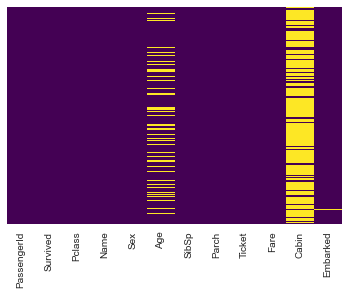

In [267]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### From above heatmap we can see that 'cabin' and 'age' has more number of null values.
#### 'cabin' column has more null value than 'age' column.
#### so we can say that about "cabin" data is missing in this data set

<AxesSubplot:xlabel='Survived', ylabel='count'>

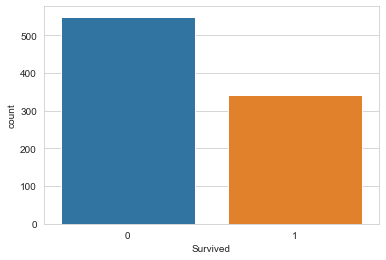

In [268]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

###  from above countplot  we can say that suvival rate is less than the non-survival rate

<AxesSubplot:xlabel='Survived', ylabel='count'>

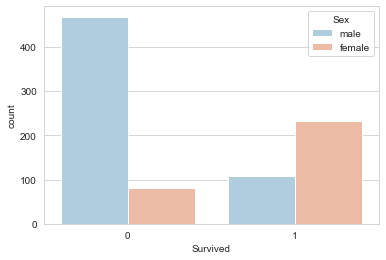

In [269]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

### female has more survival rate than the male

<AxesSubplot:xlabel='Survived', ylabel='count'>

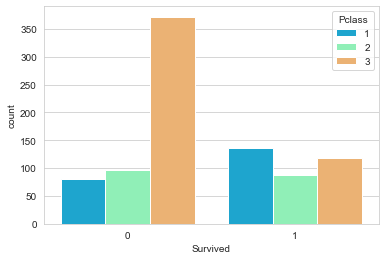

In [270]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

### above plot we can conclue that richness has impacted on survival rate, because more of class-1 members are survived compare to the class-2 and class-3.

<AxesSubplot:xlabel='Age'>

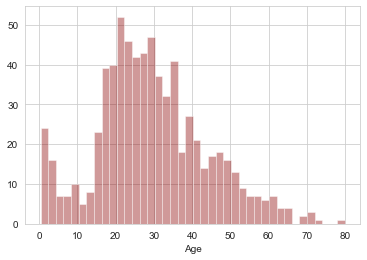

In [271]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

#### we can say that age is normally distributed in this dataset

<AxesSubplot:>

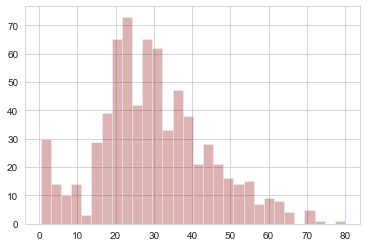

In [272]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

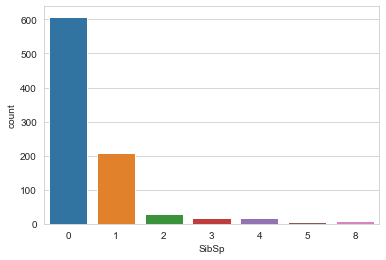

In [273]:
sns.countplot(x='SibSp',data=train)

### sibsp here indicate presence of siblings and sponse.
#### from above graph we can say most of not having any sibling or sponse. and few of them having any one either sibling or sponse.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

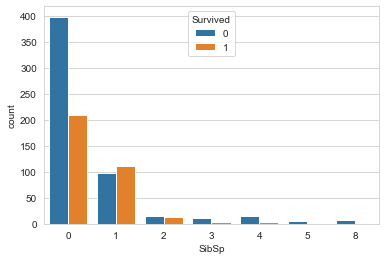

In [274]:
sns.countplot(x='SibSp',hue='Survived', data=train)

#### from this we can say sibsp has no direct impact on survival, but they do contribute in suvrival rate.

<AxesSubplot:>

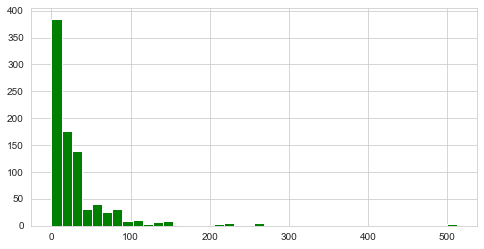

In [275]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Fare'>

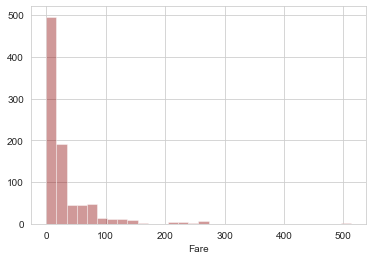

In [276]:
sns.distplot(train['Fare'],kde=False,color='darkred',bins=30)

In [277]:
import sys
import cufflinks as cf
cf.go_offline()

In [278]:
##!pip install cufflinks

In [279]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

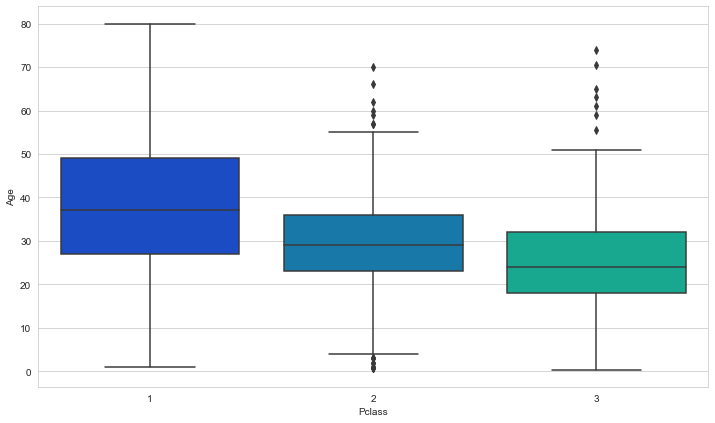

In [280]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

##  handling missing values and dealing with categorical column

In [281]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [282]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

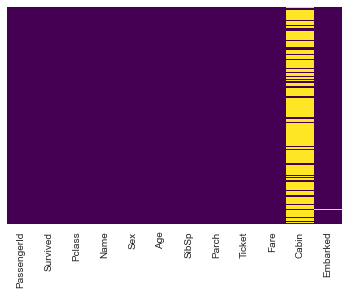

In [283]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [284]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [285]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [286]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [287]:
train = pd.concat([train,sex,embark],axis=1)

In [288]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


In [289]:
train.Name=train['Name'].str.split(',')

In [290]:
train['SurName']=train.Name.str[0]
train['FullName']=train.Name.str[1]

In [291]:
train['SurName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: SurName, Length: 891, dtype: object

In [292]:
train['FullName']

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: FullName, Length: 891, dtype: object

In [293]:
train.FullName=train['FullName'].str.split('.')

In [294]:
Title=train['FullName'].str[0]

In [295]:
Title

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: FullName, Length: 891, dtype: object

In [296]:
Title.isnull().sum()

0

In [297]:
train['Title']=Title

In [298]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,SurName,FullName,Title
0,1,0,3,"[Braund, Mr. Owen Harris]",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,Braund,"[ Mr, Owen Harris]",Mr
1,2,1,1,"[Cumings, Mrs. John Bradley (Florence Briggs ...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,Cumings,"[ Mrs, John Bradley (Florence Briggs Thayer)]",Mrs
2,3,1,3,"[Heikkinen, Miss. Laina]",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,"[ Miss, Laina]",Miss
3,4,1,1,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,"[ Mrs, Jacques Heath (Lily May Peel)]",Mrs
4,5,0,3,"[Allen, Mr. William Henry]",35.0,0,0,373450,8.0500,NaN,1,0,1,Allen,"[ Mr, William Henry]",Mr


In [299]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [300]:
def Title_col(Title):
        if Title == ' Capt':
            return 'Mr'

        elif Title == ' Master':
            return 'Mr'
        
        elif Title == ' Mme':
             return  'Miss'
        
        elif Title == ' Ms':
             return "Miss"
        
        elif Title == ' Major':
             return  "Miss"
        
        elif Title == ' Lady':
             return  'Miss'
        
        elif Title == ' Mlle':
             return 'Miss'
        
        elif Title == ' Sir':
             return  'Mr'
        
        elif Title == ' Mrs':
             return 'Mrs'
        
        elif Title == ' Mr':
             return 'Mr'
        else:
            return 'Rare'

  

In [301]:
train['Title'] = train['Title'].apply(Title_col)

In [302]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,SurName,FullName,Title
0,1,0,3,"[Braund, Mr. Owen Harris]",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,Braund,"[ Mr, Owen Harris]",Mr
1,2,1,1,"[Cumings, Mrs. John Bradley (Florence Briggs ...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,Cumings,"[ Mrs, John Bradley (Florence Briggs Thayer)]",Mrs
2,3,1,3,"[Heikkinen, Miss. Laina]",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,"[ Miss, Laina]",Rare
3,4,1,1,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,"[ Mrs, Jacques Heath (Lily May Peel)]",Mrs
4,5,0,3,"[Allen, Mr. William Henry]",35.0,0,0,373450,8.0500,NaN,1,0,1,Allen,"[ Mr, William Henry]",Mr


In [303]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Rare', 'Miss'], dtype=object)

In [304]:
def title_num(Title):
    if Title == 'Mr':
        return 1
    if Title == 'Mrs':
        return 2
    if Title == 'Miss':
        return 3
    else:
        return 4

In [305]:
train['Title'] = train['Title'].apply(title_num)

In [306]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,SurName,FullName,Title
0,1,0,3,"[Braund, Mr. Owen Harris]",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,Braund,"[ Mr, Owen Harris]",1
1,2,1,1,"[Cumings, Mrs. John Bradley (Florence Briggs ...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,Cumings,"[ Mrs, John Bradley (Florence Briggs Thayer)]",2
2,3,1,3,"[Heikkinen, Miss. Laina]",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,"[ Miss, Laina]",4
3,4,1,1,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,"[ Mrs, Jacques Heath (Lily May Peel)]",2
4,5,0,3,"[Allen, Mr. William Henry]",35.0,0,0,373450,8.0500,NaN,1,0,1,Allen,"[ Mr, William Henry]",1


In [307]:
train.groupby(['Title'])['Survived'].value_counts()

Title  Survived
1      0           454
       1           105
2      1            99
       0            26
3      1             6
       0             1
4      1           132
       0            68
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

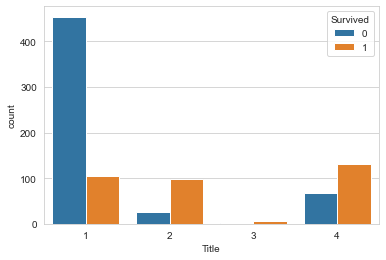

In [308]:
sns.countplot(x='Title',hue='Survived', data=train)

### 1-mr, 2-mrs, 3-miss, 4-rare

## max survival rate are seen in rare title 
### hence we can assume that survived are based on the position with title.

In [309]:
pd.pivot_table(train, index='Survived', values=['Age', 'Fare','SibSp','Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,29.560109,22.117887,0.329690,0.553734
1,28.273889,48.395408,0.464912,0.473684


In [310]:
pd.pivot_table(train, index='Survived', columns='Fare', values='Ticket', aggfunc='count')

Fare,0.0000,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,...,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Survived,,,,,,,,,,,,,,,,,,,,,
0,14.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,2.0,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,3.0,NaN,NaN,3.0,1.0,2.0,2.0,3.0


### from this we can say fare has direct impact on the survival rate. expensive fare ticket individual  has more survival rate compare to less expensive fare individual

In [311]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
male             0
Q                0
S                0
SurName          0
FullName         0
Title            0
dtype: int64

In [312]:
train.drop(columns='Cabin',axis=1, inplace= True)

In [313]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
male           0
Q              0
S              0
SurName        0
FullName       0
Title          0
dtype: int64

In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   male         891 non-null    uint8  
 10  Q            891 non-null    uint8  
 11  S            891 non-null    uint8  
 12  SurName      891 non-null    object 
 13  FullName     891 non-null    object 
 14  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.3+ KB


In [315]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783,1.829405
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876,1.227068
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,4.000000


In [316]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'male', 'Q', 'S', 'SurName', 'FullName', 'Title'],
      dtype='object')

In [317]:
# selecting dependent and independent veriables
x=train.drop(columns=['PassengerId','Name','SurName','FullName','Ticket','Survived'], axis=1)
y=train['Survived']

In [318]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title
0,3,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,2
2,3,26.0,0,0,7.9250,0,0,1,4
3,1,35.0,1,0,53.1000,0,0,1,2
4,3,35.0,0,0,8.0500,1,0,1,1


In [319]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [320]:
# spliting data into train and test

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [322]:
x_train.shape

(712, 9)

In [323]:
x_test.shape

(179, 9)

In [324]:
y_train.shape

(712,)

In [325]:
y_test.shape

(179,)

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [327]:
dtc=DecisionTreeClassifier()
#rf=RandomForestRegressor()
knn=KNeighborsClassifier()
lr=LogisticRegression()
svc=SVC()

In [328]:
for i in [dtc, svc, lr, knn]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))


DecisionTreeClassifier()
[1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1]
0.7597765363128491
[[86 20]
 [23 50]]
SVC()
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0]
0.6480446927374302
[[96 10]
 [53 20]]
LogisticRegression()
[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 

In [329]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [330]:
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()


In [331]:
for i in [rf,ab,gb]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))

    

RandomForestClassifier()
[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1]
0.7541899441340782
[[90 16]
 [28 45]]
AdaBoostClassifier()
[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1]
0.770949720670391
[[90 16]
 [25 48]]
GradientBoostingClassifier()
[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 

In [332]:
from sklearn.model_selection import cross_val_score 

In [333]:
for i in range (2,9):
    cv = cross_val_score(rf,x,y, cv=i)
    print(rf, cv.mean())

RandomForestClassifier() 0.7946011991736787
RandomForestClassifier() 0.7957351290684626
RandomForestClassifier() 0.806957742495859
RandomForestClassifier() 0.8114807607808675
RandomForestClassifier() 0.8136979261140335
RandomForestClassifier() 0.819380975815523
RandomForestClassifier() 0.8160392535392536


In [334]:
for i in range (2,9):
    cv = cross_val_score(gb,x,y, cv=i)
    print(gb, cv.mean())

GradientBoostingClassifier() 0.8002468886985439
GradientBoostingClassifier() 0.8069584736251403
GradientBoostingClassifier() 0.8327929947885104
GradientBoostingClassifier() 0.8238089259933462
GradientBoostingClassifier() 0.8260399661406373
GradientBoostingClassifier() 0.8317017013498312
GradientBoostingClassifier() 0.837335102960103


In [335]:
from sklearn.model_selection import GridSearchCV

In [336]:
param_grid= {'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_samples':[50,100,250,500,1000],
'min_samples_split':[2,4,10]}
gcv_rf = GridSearchCV(rf, param_grid, cv=3)

In [337]:
# fitting a model
res = gcv_rf.fit(x_train,y_train)

In [338]:
res.best_params_

{'max_depth': None,
 'max_samples': 250,
 'min_samples_split': 4,
 'n_estimators': 70}

In [339]:
param_grid2= {'learning_rate':[0.1,0.01], 'n_estimators':[100,50,10],'max_depth':[3,4,5],'min_samples_leaf':[2,3,4],
'min_samples_split':[1,2,3]}

In [340]:
gcv_gb = GridSearchCV(gb, param_grid2, cv=3)

In [341]:
res1 = gcv_gb.fit(x_train,y_train)

In [342]:
res1.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [343]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
model= GradientBoostingClassifier(learning_rate= 0.1,
 max_depth= 4,
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 50)


In [344]:
model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, n_estimators=50)

In [345]:
pred1=model.predict(x_test)
pred1

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [346]:
accuracy_score(y_test,pred1)

0.8435754189944135

In [347]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
model1= RandomForestClassifier(max_depth= None,
 max_samples= 250,
 min_samples_split= 2,
 n_estimators= 30,
 criterion='entropy')
model1.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_samples=250, n_estimators=30)

In [348]:
pred2=model1.predict(x_test)
pred2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [349]:
accuracy_score(y_test,pred2)

0.8603351955307262

## Saving  the model

In [350]:
import joblib


In [351]:
#from sklearn.externals import joblib
joblib.dump(model1,'titanic_survival_predict.obj')

['titanic_survival_predict.obj']

## importing saved model

In [352]:
model2=joblib.load('titanic_survival_predict.obj')

## importing test data

In [353]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [354]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [355]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [356]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [357]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [358]:
test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [359]:
test = pd.concat([test,sex,embark],axis=1)

In [360]:
test.Name=test['Name'].str.split(',')

In [361]:
test['SurName']=test.Name.str[0]
test['FullName']=test.Name.str[1]

In [362]:
test.FullName=test['FullName'].str.split('.')

In [363]:
Title=test['FullName'].str[0]

In [364]:
test['Title']=Title

In [365]:
def Title_col(Title):
        if Title == ' Capt':
            return 'Mr'

        elif Title == ' Master':
            return 'Mr'
        
        elif Title == ' Mme':
             return  'Miss'
        
        elif Title == ' Ms':
             return "Miss"
        
        elif Title == ' Major':
             return  "Miss"
        
        elif Title == ' Lady':
             return  'Miss'
        
        elif Title == ' Mlle':
             return 'Miss'
        
        elif Title == ' Sir':
             return  'Mr'
        
        elif Title == ' Mrs':
             return 'Mrs'
        
        elif Title == ' Mr':
             return 'Mr'
        else:
            return 'Rare'

  

In [366]:
test['Title'] = test['Title'].apply(Title_col)

In [367]:
def title_num(Title):
    if Title == 'Mr':
        return 1
    if Title == 'Mrs':
        return 2
    if Title == 'Miss':
        return 3
    else:
        return 4

In [368]:
test['Title'] = test['Title'].apply(title_num)

In [369]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S,SurName,FullName,Title
0,892,3,"[Kelly, Mr. James]",34.5,0,0,330911,7.8292,NaN,1,1,0,Kelly,"[ Mr, James]",1
1,893,3,"[Wilkes, Mrs. James (Ellen Needs)]",47.0,1,0,363272,7.0000,NaN,0,0,1,Wilkes,"[ Mrs, James (Ellen Needs)]",2
2,894,2,"[Myles, Mr. Thomas Francis]",62.0,0,0,240276,9.6875,NaN,1,1,0,Myles,"[ Mr, Thomas Francis]",1
3,895,3,"[Wirz, Mr. Albert]",27.0,0,0,315154,8.6625,NaN,1,0,1,Wirz,"[ Mr, Albert]",1
4,896,3,"[Hirvonen, Mrs. Alexander (Helga E Lindqvist)]",22.0,1,1,3101298,12.2875,NaN,0,0,1,Hirvonen,"[ Mrs, Alexander (Helga E Lindqvist)]",2


In [370]:
prediction_columns=x_train.columns
prediction_columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'Title'], dtype='object')

In [371]:
prediction = model2.predict(test[prediction_columns])

In [372]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## creating submission dataframe

In [373]:
submission=pd.DataFrame()
submission['PassengeId']=test['PassengerId']
submission['Survived']= prediction
submission.head()

,PassengeId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## converting dataframe into csv for submission

In [374]:
len(submission)

418

In [375]:
len(test)

418

In [376]:
submission.to_csv('../titanic_prediction_submission.csv', index=False)

In [377]:
check= pd.read_csv('../titanic_prediction_submission.csv')

In [378]:
check.head()

,PassengeId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [379]:
submission.to_csv('C:/Users/mounika/Desktop/aug DS files/aug cls notes/aug PROJECT --/project submission to institute/titanic_prediction_submission.csv', index=False)